#  Stationary Processes

---
> Erick Eduardo Aguilar Hernández:
> * mat.ErickAguilar@ciencias.unam.mx
> * isc.ErickAguilar@gmail.com
---

## Stochastic Processes

A stochastic process is a set of random variables $\{X_t\}_{t \in T}$ indexed for a subset of real numbers $T \subset \mathbb{R}$, for time series purpouses we asume the index set $T = \mathbb{N}$. Since $\{X_t\}$ its a family of random variables teh distribution of $\{X_t\}_{t \in \mathbb{N}}$  its given by:

$$ F_{X_{t1},...,X_{tn}} (x_1,...,x_n) = P[X_{t1}\leq x_1,...,X_{tn}\leq x_n]$$

Functions asociated to a stochastic process $X_t$:

* *Mean function:* $\mu_t = E[X_t]$
* *Variance function:* $\sigma^2_t = E[X_t-\mu_t]^2$
* *Covariance function:* $\gamma(t_1,t_2)=E[(X_{t_1}-\mu_{t_1})(X_{t_2}-\mu_{t_2})]$
* *Correlation function:* $\rho(t_1,t_2)=\frac{\gamma(t_1,t_2)}{\sqrt{\sigma^2_{t_1}}\sqrt{\sigma^2_{t_2}}}$


### Stationary processes

A stochastic process is said to be **strongly stationary** (first order stationary) if the distirbution of the process its T-invariant, i.e., the distribution don't depends of the index set T.

$$ F_{X_{t1},...,X_{tn}} (x_1,...,x_n) = F_{X_{t1+\tau},...,X_{tn+\tau}} (x_1,...,x_n) \qquad \forall \tau \geq 0$$

A stochastic process is said to be **weakly stationary** (second order stationary) if satisfy:
* $E[|X_t|] < \infty$ 
* $E[X_t^2] < \infty$ 
* $E[X_t] = E[X_{t+k}]$ 
* $E[X_t^2] = E[X_{t+k}^2]$ 

**Obervations:** 
* Strong stationarity $\implies$ weakly stationarity
* For a stationarity process the mean and the variace are constants: 
$$E[X_t]=\mu_t=\mu \quad V[X_t]=\sigma^2_t=\sigma^2$$
* For any $t_1, t_2, k \in \mathbb{Z}$, $\gamma(t_1, t_2)=\gamma(t_1+k, t_2+k)$ so $t_1 = t_1+k$ and $t_2 = t_2+k$ lets $t_1-k =t$ and $t_2=t$ then $\gamma(t_1, t_2)=\gamma(t-k,t)=\gamma(t,t+k)=\gamma(k)$ it means that $\gamma$ depends only of the difference k.
* For any $t_1, t_2, k \in \mathbb{Z}$, $\rho(t_1, t_2)=\rho(k)$ it means that $\rho$ depends only of the difference k.

### Functions asociated to a stationary process

Lets $X_t$ a sationary then the following functions asociated to the process are:

* *Autovariance function:* $\gamma(X_t,X_{t+k})=E[(X_{t}-\mu_{t})(X_{t+k}-\mu_{t+k})]=\gamma(k)$
* *Autocorrelation function:* $\rho(X_t,X_{t+k})=\frac{\gamma(X_t,X_{t+k})}{\sqrt{V[X_t]}\sqrt{V[X_{t+k}]}}=\frac{\gamma(k)}{\gamma(0)}$

**Properties**:
* $\gamma(0) = V[X_t]$ and $|\gamma(k)| \leq \gamma(0)$
* $\rho(0)=1$ and $|\rho(k)| \leq 1$
* $\rho(k)=\rho(-k)$ and $\gamma(k)=\gamma(-k)$


**Example: ** White noise process

A white noise $X_t \sim WN(0,\sigma^2)$ its a process such that $t \in \mathbb{R}$:
* $E[X_t]=0 \quad \forall$
* $V[X_t]=\sigma^2 \leq \infty$
* $Cov[X_t,Y_s]=0 \quad t \neq s$

A white noise is said to be gaussian noise if $X_t \sim N(0,\sigma^2)$. 

In [1]:
%matplotlib inline
import numpy
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
def plotTimeSeries(timeSeries,styles=None,colors=None):
    if styles==None: styles=['-' for i in range(0,len(timeSeries.columns))] 
    if colors==None: colors=['darkblue']+['C'+str(i) for i in range(1,len(timeSeries.columns))]
    fig, ax = plt.subplots()
    for col, style, color in zip(timeSeries.columns,styles,colors):
        timeSeries[col].plot(style=style,ax=ax,color=color,label=col,figsize=(15,7))
        plt.legend(loc='upper left')
    plt.show()

Gaussian noise process simulation

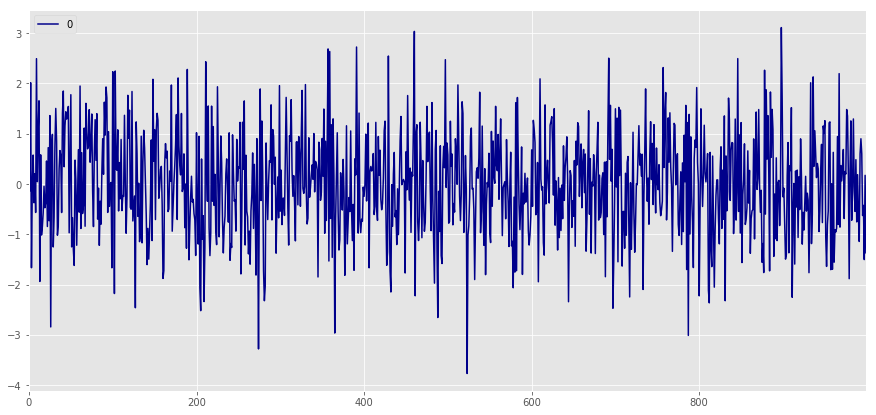

In [2]:
plt.style.use('ggplot')
num_samples = 1000
plotTimeSeries(pd.DataFrame(numpy.random.normal(0,1,size=num_samples)))